<a href="https://colab.research.google.com/github/soymarwin/ee298z-assignment01/blob/master/best_mlp_cnn_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EE298Z-Assignment01**
## **Best 3-layer MLP and CNN Configuration for CIFAR10 Img. Clsf. with SGD**
#### Written and Performed by **Marwin B. Alejo 2020-20221**
#### Performed on **September 26, 2020**

###### *Note: The following cells below are best viewed in Google Colab!*

**REQUIREMENTS**
1. Build a classifier on CIFAR10 dataset using MLP and CNN
2. The last layer is Dense
3. Hyperparameters are open for modification except for optimizer must be SGD
4. Use Jupyter notebook shared via Github
5. Implement using Keras or Pytorch
6. Compare best MLP and CNN

**USED COMPUTE RESOURCES**
1. Google Colab in CPU and TPU modes


### **Overview**
Among all the modeling and trials made for CIFAR10 image classification as shown [in this notebook](https://github.com/soymarwin/ee298z-assignment01/blob/master/complete_cifar10_mlp_cnn_trials.ipynb), only the following configurations below were found the best performing MLP and CNN models with the consideration of the above-listed requirements.

The best performing MLP from the pool of MLP trials achieved an accuracy score of 53.49%. Although other MLP configurations achieved a test accuracy of more than 55%, it is observed that these configurations are overfitting.

Likewise, the best performing 3-layer CNN from the pool of CNN trials achieved a test accuracy of 82.85%. The unique parameter in this configuration is that it uses the LeakyReLU activation function as configurations with eLU and ReLU yields lower accuracies.

Additionally, a 3-block CNN was explored and yields a test accuracy of 89.17%. Unlike the 3-layer CNN configuration above, this 3-block CNN uses the eLU activation function and average pooling.

Overall, in terms of performance, eventhough CNN is computationally expensive in comparison to MLP, CNN performs better for image classification task than MLP. Although MLP is capable of the said task, it is prone to abnormal(under/over) fitting depending on the extent of the MLP network design. Also, with the 3-layer network design requirement, CNN achieves an accuracy of 82% to 89% while MLP achieves at arounf 52% to 56%. 

### **Best 3-layer MLP Configuration**

MLP with Dropout Architecture:
Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)        

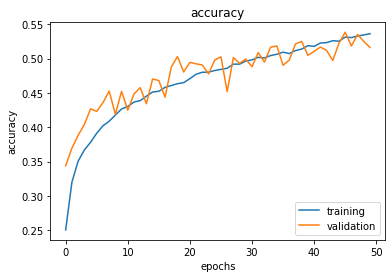

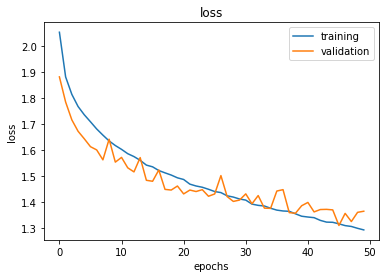

Loss: 130.09%
Accuracy: 53.49%


In [ ]:
# Lib forevs
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple as nt
from keras.models import Model
from keras.layers import Dense, Activation, Flatten, Dropout, Input
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.datasets import cifar10
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

# Organizing CIFAR10 data as DATA
Data = nt("Data", "x_train y_train x_valid y_valid x_test y_test")

# Visualize the data.
def visualize_data(data):
    images_to_show = 36
    per_row = 12
    fig = plt.figure(figsize=(20,5))
    for i in range(images_to_show):
        pos = (i // per_row, ((i % per_row) + per_row) % per_row)
        ax = plt.subplot2grid((int(images_to_show / per_row), per_row),
                              pos, xticks=[], yticks=[])
        ax.imshow(np.squeeze(data.x_train[i]))
    plt.show()

# Function for model visualization
def visualize_training(hist):
    # Training v. validation accuracy chart
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='lower right')
    plt.show()
    
    # Training v. validation loss chart
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='upper right')
    plt.show()

# Function to preprocess data
def preprocess(data, categories):
    x_train = data.x_train.astype("float32") / 255
    x_test = data.x_test.astype("float32") / 255
    y_train = to_categorical(data.y_train, categories)
    y_test = to_categorical(data.y_test, categories)    
    return Data(x_train[5000:], y_train[5000:],
                x_train[:5000], y_train[:5000],
                x_test, y_test)
    
# MLP architecture with dropout
def dropout_mlp(data, categories):
  inputs = Input(input_shape, )
  y = Flatten()(inputs)
  y = Dense(hidden_layer_1, activation=activation_1)(y)
  y = Dropout(dropout_1)(y)
  y = Dense(hidden_layer_2, activation=activation_1)(y)
  y = Dropout(dropout_2)(y)
  outputs = Dense(categories, activation=activation_2)(y)
  model = Model(inputs=inputs, outputs=outputs)
  model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
  return model

# Load CIFAR10 Data as data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
data = Data(x_train, y_train, None, None, x_test, y_test)

# visualize CIFAR10 data samples (optional)
# visualize_data(data) # uncomment when wanted

# Preprocess the loaded data
categories = len(np.unique(data.y_train))
processed_data = preprocess(data, categories)

# Parameters for MLP training
input_shape = data.x_train.shape[1:]
epochs = 50
batch_size = 32
dropout_1 = 0.5
dropout_2 = 0.5
hidden_layer_1 = 1024
hidden_layer_2 = 512
activation_1 = 'relu'
activation_2 = 'softmax'
optimizer = "sgd"
loss = "categorical_crossentropy"
metrics = ['accuracy']

# Build MLP model with dropout
mlp_dropout = dropout_mlp(processed_data, categories)
print("MLP with Dropout Architecture:")
mlp_dropout.summary()
mlp_dropout_weights_path = "best_dropout_MLP_model_cifar10.hdf5"

# vanilla_mlp
cp_dropout_mlp = ModelCheckpoint(filepath=mlp_dropout_weights_path, 
                                   verbose=1, save_best_only=True)
hist_dropout_mlp = mlp_dropout.fit(processed_data.x_train, 
                   processed_data.y_train, 
                   batch_size=batch_size, 
                   epochs=epochs, 
                   validation_data=(processed_data.x_valid,
                                    processed_data.y_valid),
                   callbacks=[cp_dropout_mlp], shuffle=True)
# Train built mlp model with dropout
mlp_dropout.load_weights(mlp_dropout_weights_path)
score_mlp_dropout = mlp_dropout.evaluate(processed_data.x_test, processed_data.y_test, verbose=0)
visualize_training(hist_dropout_mlp)
print("Loss: %.2f%%" % (score_mlp_dropout[0]*100))
print("Accuracy: %.2f%%" % (score_mlp_dropout[1]*100))

### **Best 3-layer CNN Configuration**

INFO:tensorflow:Initializing the TPU system: grpc://10.11.152.2:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.11.152.2:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Model: "functional_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 32, 32, 64)        4864      
_________________________________________________________________
batch_normalization_46 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 16, 16, 128)     

388/390 [============================>.] - ETA: 0s - loss: 1.9092 - sparse_categorical_accuracy: 0.3582WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0017s vs `on_test_batch_end` time: 0.0123s). Check your callbacks.


390/390 [==============================] - 11s 28ms/step - loss: 1.9080 - sparse_categorical_accuracy: 0.3588 - val_loss: 2.3095 - val_sparse_categorical_accuracy: 0.2218
Epoch 2/125
390/390 [==============================] - 9s 22ms/step - loss: 1.5267 - sparse_categorical_accuracy: 0.4622 - val_loss: 1.3952 - val_sparse_categorical_accuracy: 0.5080
Epoch 3/125
390/390 [==============================] - 9s 22ms/step - loss: 1.3628 - sparse_categorical_accuracy: 0.5218 - val_loss: 1.4513 - val_sparse_categorical_accuracy: 0.5008
Epoch 4/125
390/390 [==============================] - 9s 22ms/step - loss: 1.2563 - sparse_categorical_accuracy: 0.5568 - val_loss: 1.4834 - val_sparse_categorical_accuracy: 0.5087
Epoch 5/125
390/390 [==============================] - 9s 22ms/step - loss: 1.1852 - sparse_categorical_accuracy: 0.5832 - val_loss: 1.4124 - val_sparse_categorical_accuracy: 0.5067
Epoch 6/125
390/390 [==============================] - 8s 22ms/step - loss: 1.1302 - sparse_categoric

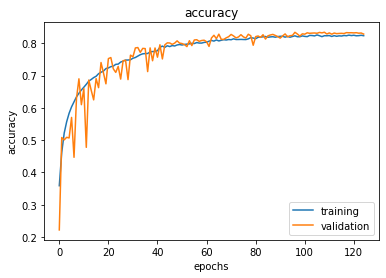

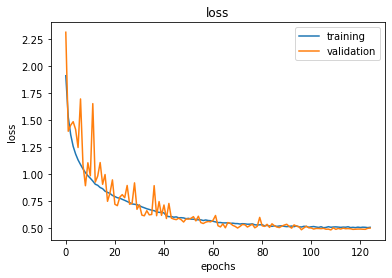

Loss: 50.09%
Accuracy: 82.85%


In [ ]:
import tensorflow as tf
import os
import tensorflow.keras.layers as layers
import numpy as np
import pickle
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint

# TPU
tpu_grpc_url = "grpc://" + os.environ["COLAB_TPU_ADDR"]
tpu_cluster_resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu_grpc_url)
tf.config.experimental_connect_to_cluster(tpu_cluster_resolver)
tf.tpu.experimental.initialize_tpu_system(tpu_cluster_resolver)
strategy = tf.distribute.experimental.TPUStrategy(tpu_cluster_resolver)

def data_augmentation(image):
    y = tf.cast(image, tf.float32) / 255.0
    y = tf.image.random_flip_left_right(y)
    y = tf.pad(y, tf.constant([[2, 2], [2, 2], [0, 0]]), "REFLECT")
    y = tf.image.random_crop(y, size=[32, 32, 3])
    return y

def conv_bn_elu(inputs, ch, reps):
    y = inputs
    for i in range(reps):
        y = layers.Conv2D(ch, 5, padding="same")(y)
        # y = layers.BatchNormalization()(y)
        y = layers.LeakyReLU(alpha=0.05)(y)
    return y

def create_model():
    inputs = layers.Input((32, 32, 3))
    y = conv_bn_elu(inputs, 64, 1)
    y = layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(y)
    y = layers.Dropout(0.25)(y)
    y = conv_bn_elu(y, 128, 1)
    y = layers.MaxPooling2D(pool_size=(2,2))(y)
    y = layers.Dropout(0.25)(y)
    y = conv_bn_elu(y, 256, 1)
    y = layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(y)
    y = layers.Dropout(0.25)(y)
    y = layers.Flatten()(y)
    y = layers.Dense(10, activation="softmax")(y)
    return tf.keras.models.Model(inputs, y)

def load_dataset():
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
    trainset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    trainset = trainset.map(
        lambda image, label: (data_augmentation(image), tf.cast(label, tf.float32))
    ).shuffle(buffer_size=1024).repeat().batch(128)

    testset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
    testset = testset.map(
        lambda image, label: (tf.cast(image, tf.float32) / 255.0, tf.cast(label, tf.float32))
    ).batch(128)

    return trainset, testset

def lr_scheduler(epoch):
    lrate = 0.001
    if epoch > 40:
        lrate = 0.0005
    if epoch > 60:
        lrate = 0.0003
    if epoch > 80:
        lrate = 0.0001
    if epoch > 100:
        lrate = 0.00003  
    return lrate

def main():
    trainset, testset = load_dataset()
    with strategy.scope():
        model = create_model()
        loss = tf.keras.losses.SparseCategoricalCrossentropy()
        acc = tf.keras.metrics.SparseCategoricalAccuracy()

        # callback
        scheduler = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
        hist = tf.keras.callbacks.History()
        # cp_cnn = ModelCheckpoint("best_CNN_cifar10.hdf5", verbose=1, save_best_only=True)
        optim = tf.keras.optimizers.SGD(0.001, momentum=0.9)

        # train
        model.compile(optimizer=optim, loss=loss, metrics=[acc])
        model.summary()
        model.fit(trainset, validation_data=testset, epochs=125, steps_per_epoch=50000 // 128,
                  callbacks=[scheduler, hist], shuffle=True)
    
    # model.load_weights("best_CNN_cifar10.hdf5")
    history = hist.history
    plt.plot(history['sparse_categorical_accuracy'])
    plt.plot(history['val_sparse_categorical_accuracy'])
    plt.title('accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='lower right')
    plt.show()
    
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='upper right')
    plt.show()

    score = model.evaluate(testset, verbose=0)
    print("Loss: %.2f%%" % (score[0]*100))
    print("Accuracy: %.2f%%" % (score[1]*100))

main()

### **Best 3-block CNN Configuration**

INFO:tensorflow:Initializing the TPU system: grpc://10.11.152.2:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.11.152.2:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Model: "functional_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_58 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_46 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_59 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_47 (Activation)   (None, 32, 32, 64)      

390/390 [==============================] - ETA: 0s - loss: 1.6438 - sparse_categorical_accuracy: 0.4006WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0020s vs `on_test_batch_end` time: 0.0122s). Check your callbacks.


390/390 [==============================] - 14s 36ms/step - loss: 1.6438 - sparse_categorical_accuracy: 0.4006 - val_loss: 2.2315 - val_sparse_categorical_accuracy: 0.2359
Epoch 2/250
390/390 [==============================] - 11s 29ms/step - loss: 1.3685 - sparse_categorical_accuracy: 0.5136 - val_loss: 1.3426 - val_sparse_categorical_accuracy: 0.5117
Epoch 3/250
390/390 [==============================] - 11s 28ms/step - loss: 1.2294 - sparse_categorical_accuracy: 0.5661 - val_loss: 1.2021 - val_sparse_categorical_accuracy: 0.5625
Epoch 4/250
390/390 [==============================] - 11s 29ms/step - loss: 1.1448 - sparse_categorical_accuracy: 0.5970 - val_loss: 1.1604 - val_sparse_categorical_accuracy: 0.5852
Epoch 5/250
390/390 [==============================] - 11s 29ms/step - loss: 1.0727 - sparse_categorical_accuracy: 0.6240 - val_loss: 1.0167 - val_sparse_categorical_accuracy: 0.6431
Epoch 6/250
390/390 [==============================] - 12s 31ms/step - loss: 1.0176 - sparse_cate

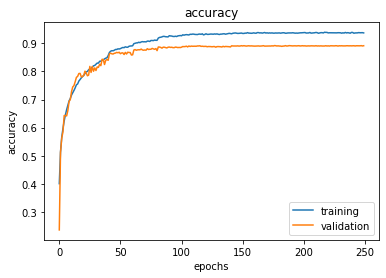

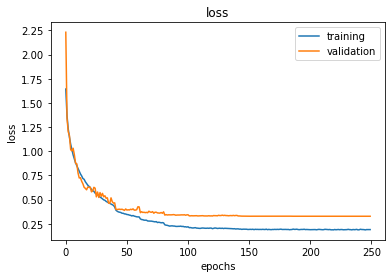

Loss: 32.79%
Accuracy: 89.17%


In [ ]:
import tensorflow as tf
import os
import tensorflow.keras.layers as layers
import numpy as np
import pickle
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
import math

# TPU
tpu_grpc_url = "grpc://" + os.environ["COLAB_TPU_ADDR"]
tpu_cluster_resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu_grpc_url)
tf.config.experimental_connect_to_cluster(tpu_cluster_resolver)
tf.tpu.experimental.initialize_tpu_system(tpu_cluster_resolver)
strategy = tf.distribute.experimental.TPUStrategy(tpu_cluster_resolver)

def data_augmentation(image):
    y = tf.cast(image, tf.float32) / 255.0
    y = tf.image.random_flip_left_right(y)
    y = tf.pad(y, tf.constant([[2, 2], [2, 2], [0, 0]]), "REFLECT")
    y = tf.image.random_crop(y, size=[32, 32, 3])
    return y

def conv_bn_elu(inputs, ch, reps):
    y = inputs
    for i in range(reps):
        y = layers.Conv2D(ch, 3, padding="same")(y)
        y = layers.BatchNormalization()(y)
        y = layers.Activation('elu')(y)
    return y

def create_model():
    inputs = layers.Input((32, 32, 3))
    y = conv_bn_elu(inputs, 64, 3)
    y = layers.AveragePooling2D(2)(y)
    #y = layers.Dropout(0.25)(y)
    y = conv_bn_elu(y, 128, 3)
    y = layers.AveragePooling2D(2)(y)
    #y = layers.Dropout(0.25)(y)
    y = conv_bn_elu(y, 256, 3)
    y = layers.GlobalAveragePooling2D()(y)
    y = layers.Dropout(0.25)(y)
    y = layers.Flatten()(y)
    y = layers.Dense(10, activation="softmax")(y)
    return tf.keras.models.Model(inputs, y)

def load_dataset():
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
    trainset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    trainset = trainset.map(
        lambda image, label: (data_augmentation(image), tf.cast(label, tf.float32))
    ).shuffle(buffer_size=1024).repeat().batch(128)

    testset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
    testset = testset.map(
        lambda image, label: (tf.cast(image, tf.float32) / 255.0, tf.cast(label, tf.float32))
    ).batch(128)

    return trainset, testset

def lr_scheduler(epoch):
    lrate = 0.001
    # drop = 0.5
    # epochs_drop = 10.0
    # lrate = ilrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    if epoch > 40:
        lrate = 0.0005
    if epoch > 60:
        lrate = 0.0003
    if epoch > 80:
        lrate = 0.0001
    if epoch > 100:
        lrate = 0.00003
    if epoch > 120:
        lrate = 0.00005
    if epoch > 140:
        lrate = 0.000001
    if epoch > 160:
        lrate = 0.000003
    if epoch > 180:
        lrate = 0.000005   
    if epoch > 200:
        lrate = 0.0000001   
    return lrate

def main():
    trainset, testset = load_dataset()
    with strategy.scope():
        model = create_model()
        loss = tf.keras.losses.SparseCategoricalCrossentropy()
        acc = tf.keras.metrics.SparseCategoricalAccuracy()

        # callback
        scheduler = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
        hist = tf.keras.callbacks.History()
        # cp_cnn = ModelCheckpoint("best_CNN_cifar10.hdf5", verbose=1, save_best_only=True)
        optim = tf.keras.optimizers.SGD(0.001, momentum=0.9)

        # train
        model.compile(optimizer=optim, loss=loss, metrics=[acc])
        model.summary()
        model.fit(trainset, validation_data=testset, epochs=250, steps_per_epoch=50000 // 128,
                  callbacks=[scheduler, hist], shuffle=True)
    
    # model.load_weights("best_CNN_cifar10.hdf5")
    history = hist.history
    plt.plot(history['sparse_categorical_accuracy'])
    plt.plot(history['val_sparse_categorical_accuracy'])
    plt.title('accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='lower right')
    plt.show()
    
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='upper right')
    plt.show()

    score = model.evaluate(testset, verbose=0)
    print("Loss: %.2f%%" % (score[0]*100))
    print("Accuracy: %.2f%%" % (score[1]*100))

main()